In [122]:
# Import packages
from matplotlib import pyplot
import numpy
import os

In [146]:
# Load data
# --> I have been able to load data, but not the entire structure that contains all the information
print(os.getcwd())
yhbo = numpy.loadtxt("/Users/borjablanco/Downloads/BrainHack_project/BHDonostia_2020_fNIRS/data_files/yhbo.csv", delimiter=",",
    skiprows=0) # because first line are characters/text
yhbr = numpy.loadtxt("/Users/borjablanco/Downloads/BrainHack_project/BHDonostia_2020_fNIRS/data_files/yhbr.csv", delimiter=",",
    skiprows=0) # because first line are characters/text
stim = numpy.loadtxt("/Users/borjablanco/Downloads/BrainHack_project/BHDonostia_2020_fNIRS/data_files/stim_mark.csv", delimiter=",",
    skiprows=0) # because first line are characters/text
tInc = numpy.loadtxt("/Users/borjablanco/Downloads/BrainHack_project/BHDonostia_2020_fNIRS/data_files/tInc.csv", delimiter=",",
    skiprows=0) # because first line are characters/text

/Users/borjablanco/Python_scripts_BB


[0.000000e+00 6.400000e-02 1.280000e-01 ... 1.112128e+03 1.112192e+03
 1.112256e+03]


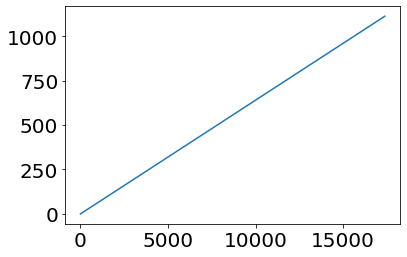

In [156]:
# Define parameters / Create time vector
sf = 15.625
time = numpy.arange(0, len(yhbo)/sf+1, 1/sf)
print(time)
pyplot.plot(time)

(-10.0, 1121.296)

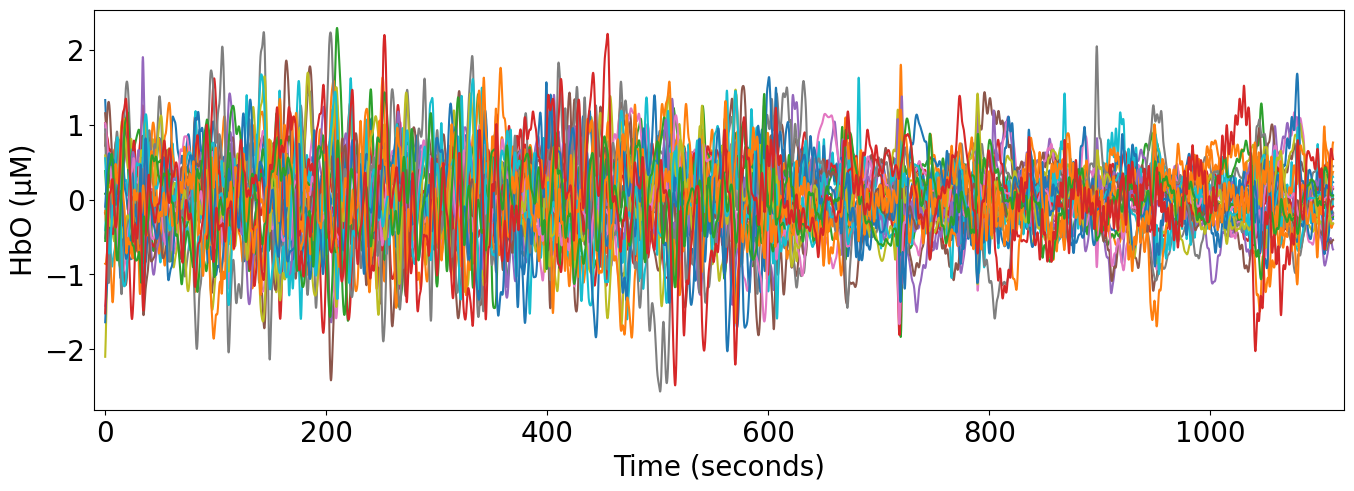

In [157]:
# Plot data
sf = 15.625
time = numpy.arange(0, len(yhbo)/sf, 1/sf)
#print(time)
#pyplot.plot(time)

# Create figure
fig = pyplot.figure(figsize=(25.0, 8.0), dpi=100)
ax = fig.add_axes([1,1,0.5,0.5])

# Now plot the data into the axes.
ax.plot(time, yhbo)

# Set the axis labels
ax.set_xlabel("Time (seconds)", fontsize=20)
ax.set_ylabel("HbO " + u"(\u03bcM)", fontsize=20)

# Set fontsize for plots
# --> I don't know how change only fontsize of axes
pyplot.rc('font', size=10)          # controls default text sizes
#pyplot.rc('axes', titlesize=20)     # fontsize of the axes title
#pyplot.rc('axes', labelsize=20)    # fontsize of the x and y labels
#pyplot.rc('xtick', labelsize=20)    # fontsize of the tick labels
#pyplot.rc('ytick', labelsize=20)    # fontsize of the tick labels
#pyplot.rc('legend', fontsize=30)    # legend fontsize
#pyplot.rc('figure', titlesize=30)  # fontsize of the figure title
ax.set_xlim(left = -10)
ax.set_xlim(right = len(yhbo)/sf+10)

# Save figure
#fig.savefig("figure_data.png")

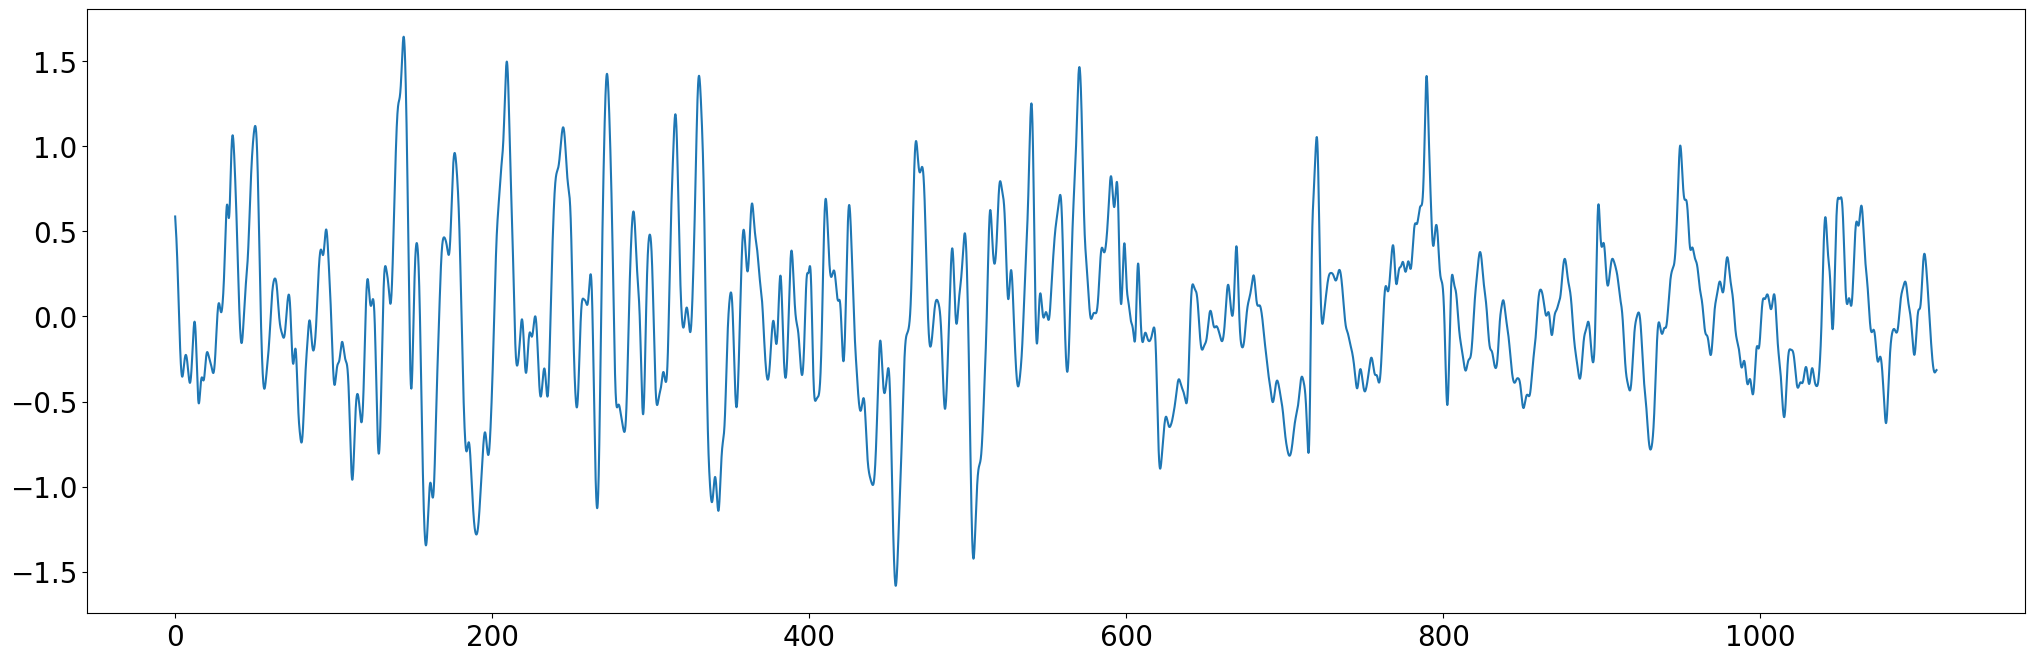

In [158]:
# Define seed region
seed = yhbo[:, 18]
fig = pyplot.figure(figsize=(25.0, 8.0), dpi=100)
pyplot.plot(time,seed)

In [159]:
print(len(tInc))
print(len(time))

17364
17364


Text(0, 0.5, 'tInc adapted')

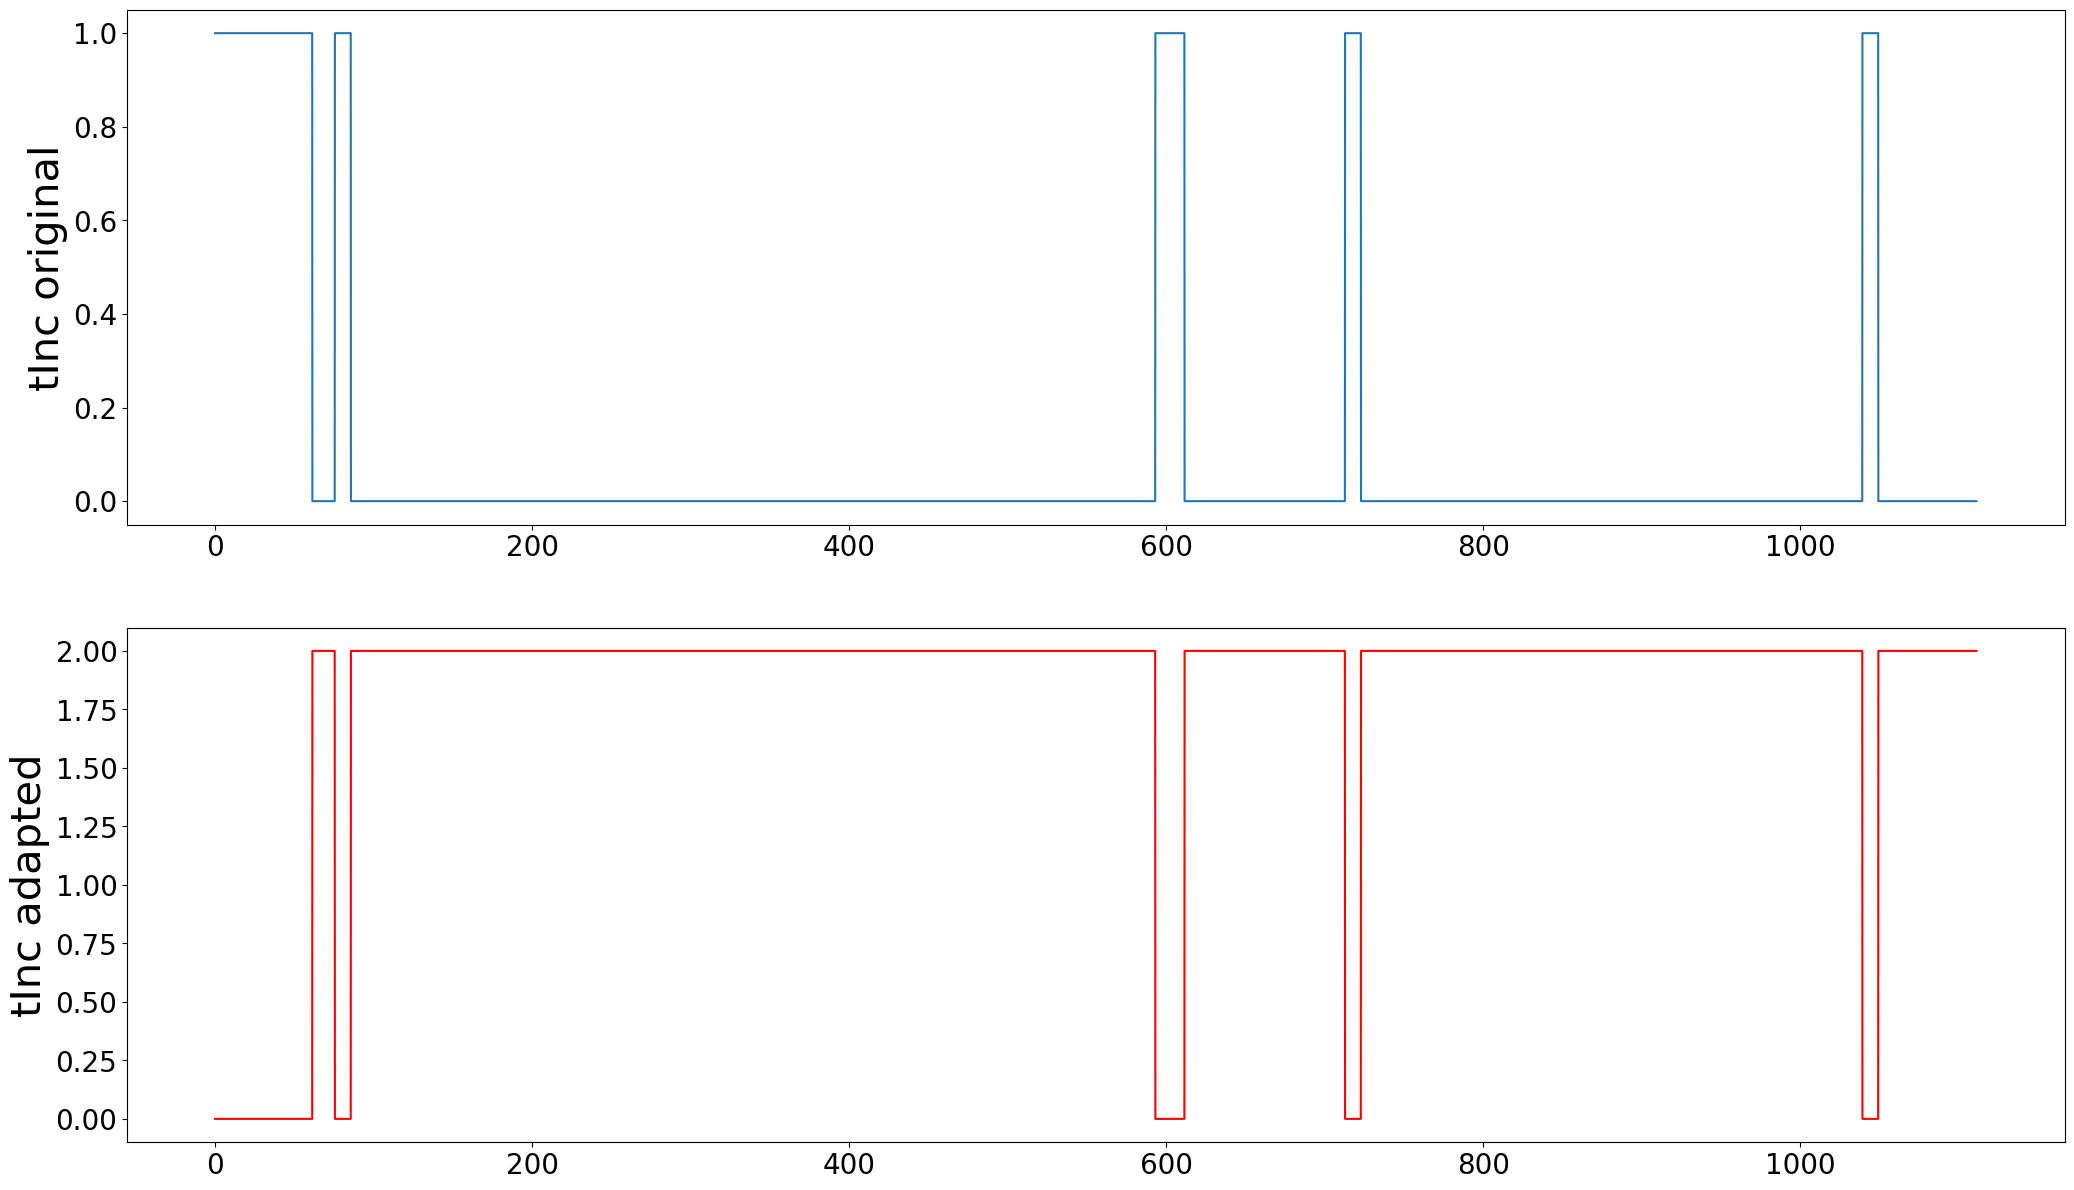

In [175]:
trange = numpy.array([-5, 25])
dt = time[2]-time[1]
nPre = round(trange[0]/dt)
nPost = round(trange[1]/dt)
tHRF = numpy.arange(1*nPre*dt, nPost*dt, dt)

tInc2 = numpy.zeros(len(tInc), dtype=float)
io = numpy.where(tInc == 0)
tInc2[io] = 2
i1 = numpy.where(tInc == 1)
tInc2[i1] = 0
i2 = numpy.where(tInc == 2)
tInc2[i2] = 1

# Create figure to double check
fig = pyplot.figure(figsize=(25.0, 15.0), dpi=100)
pyplot.subplot(211)
pyplot.plot(time,tInc)
pyplot.ylabel("tInc original", fontsize=30)
pyplot.subplot(212)
pyplot.plot(time,tInc2, color = "red")
pyplot.ylabel("tInc adapted", fontsize=30)

In [182]:
len(stim[0])

2

In [ ]:
# Create regressors of interest - function
# --> I need many of the parameters inside the function

def glm_model(yhbo, stim, time, tInc2):
    
    # Define variables
    paramsBasis = [0 6 11]; # for gamma (tau sigma T)
    trange = [-5 25];
    nT = len(time);
    trange = numpy.array([-5, 25])
    dt = time[2]-time[1]
    nPre = round(trange[0]/dt)
    nPost = round(trange[1]/dt)
    tHRF = numpy.arange(1*nPre*dt, nPost*dt, dt)    
    nTpts = len(yhbo)
    ntHRF = len(tHRF)    
    tIncAuto = tInc2
    
   # Find stim onsets for each condition
    lstCond = numpy.array[0,1]
    nCond = len(lstCond)
    onset = numpy.zeros(len(tInc2), nCond, dtype=float)
    nTrials = numpy.zeros(nCond, dtype=float)
    
    # I MADE IT TO HERE
    for iCond in range (0, nCond):
        lstT = find(s(:,lstCond(iCond))==1);
        lstp = find((lstT+nPre)>=1 & (lstT+nPost)<=nTpts);
        lst = lstT(lstp);
        nTrials(iCond) = len(lst);
        onset[lst+nPre,iCond] = 1;

    
    # Check if the list is a list or a tuple.
    if type(num_list) not in [list, tuple]:
        # Return nothing, because this function
        # should only take lists or tuples.
        return print(Fore.RED + "Error: input is not a list")
    else:
        # Start with a sum of 0.
        s = 0
        for i in range (0, len(num_list)):
        # TODO: For-loop through all numbers in the 
        # list. Add each number to the total.
            s = s + num_list[i]
        # Importance of indentation (this part belongs to the for loop)
        n = len(num_list)
        avg = s / n 
        # Return the sum.
        return tdr_fw, tdr_bw